In [815]:
import pandas as pd
import numpy as np
from scipy import interpolate
from scipy.signal import resample, iirfilter, lfilter

In [816]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 120

In [820]:
gcs_attitude = pd.read_csv('../../build/gcs_attitude.csv')
gcs_imu = pd.read_csv('../../build/gcs_highres_imu.csv')
gcs_local_position = pd.read_csv('../../build/gcs_local_position.csv')
gcs_imu = pd.read_csv('../../build/gcs_highres_imu.csv')
gcs_optical_flow = pd.read_csv('../../build/gcs_optical_flow.csv')

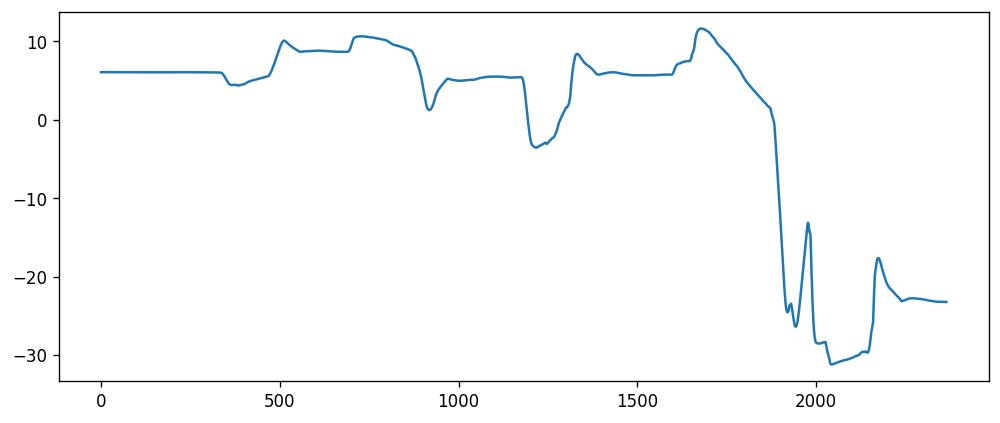

In [823]:
flow_vx = gcs_optical_flow['integrated_x'][:]
flow_vy = gcs_optical_flow['integrated_y'][:]
flow_vx = flow_vx - flow_vx.mean()
flow_ts = gcs_optical_flow['ts']
flow_dt = (flow_ts[1] - flow_ts[0]) * 1e-4

flow_x = np.cumsum(flow_vx) * flow_dt
flow_y = np.cumsum(flow_vy) * flow_dt

plt.plot(flow_vx)

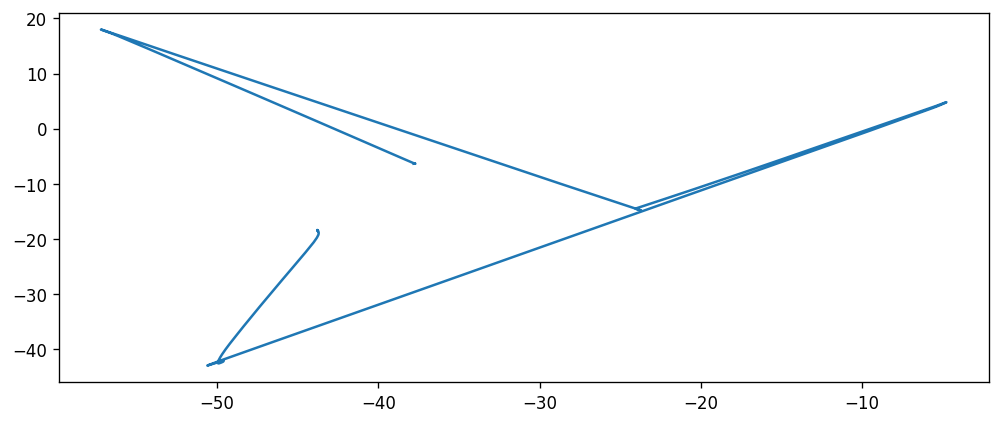

In [822]:
plt.plot(gcs_local_position['x'], gcs_local_position['y'])

In [827]:
vx = gcs_local_position['x'][:]
vy = gcs_local_position['vy'][:]

In [828]:
flow_vx_resampled = resample(flow_vx, len(vx))

In [ ]:
plt.plot(flow_x)
plt.plot(vx)